# Vorverarbeitung der Pulpillengrößen

Ich fange mal an. 

| xyz | abc |     |     |   |
|-----|-----|-----|-----|---|
|     |     |     | dsds|   |
| ggg |     |     |     |   |
|     |     | 432 |     |   |


In [1]:
import sys
sys.path.append("../Pupillengröße/Skripte/")
#%matplotlib widget
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import logging as log
import checkdata
import importlib
from IPython.display import display
def display_all(df):
    from IPython.display import HTML, display
    IPython.display(IPython.HTML(df.to_html()))
help(checkdata.plot)

Help on function plot in module checkdata:

plot(df, title)
    Plottet den Dataframe auf eine spezifische, noch undokumentierte Weise. 
    
    Parameter
    ---------
      df:    Der Dataframe, der geplottet werden soll. 
      title: Der Titel für den Plot.



In [2]:
import preprocessing
import plotting
import math
import os

importlib.reload(preprocessing)
importlib.reload(plotting)
importlib.reload(checkdata)


<module 'checkdata' from '/home/marco/Projects/KatharinaMeier/Pupille/notebooks/checkdata.py'>

In [14]:
import preprocessing
import plotting
import math
import os, getpass
import pup_config

importlib.reload(preprocessing)
importlib.reload(plotting)
importlib.reload(pup_config)
#importlib.reload(checkdata)

def plot(df,text,xcol,ycol):
    plotting.plot_preprocessed(df,text,xcol,ycol)
    
def noplot(df,text,xcol,ycol):
    pass

subject_id="PJ06_1_Ruhe"
data_dir=pup_config.data_dir

field="diameter"
ts="pupil_timestamp"

config=preprocessing.create_process_config(0,field,subject_id,data_dir)

# Set this to False, if you want to process the data
# Set this to True, if you only want to return an array of data checks 

#config.validate_only=True

eye0=preprocessing.process(config,display)
# display(eye0)

'Starting process2'

'Loop through each annotation timestamp and slice the data'

'Label the data'

'preprocess and slice data'

'nanp before=0.0, nanp after=0.0'

'nanp before=0.0, nanp after=0.0'

'nanp before=0.0, nanp after=0.0'

'nanp before=0.0, nanp after=0.0'

'nanp before=0.0, nanp after=0.0'

'nanp before=0.0, nanp after=0.0'

'nanp before=0.0, nanp after=0.0'

'nanp before=0.0, nanp after=0.0'

'nanp before=0.0, nanp after=25.04310344827586'

'nanp before=0.0, nanp after=18.60632183908046'

'nanp before=0.0, nanp after=0.0'

'nanp before=0.0, nanp after=0.0'

'nanp before=0.0, nanp after=0.0'

'nanp before=0.0, nanp after=38.4051724137931'

'nanp before=0.0, nanp after=4.0792875610456765'

'nanp before=0.0, nanp after=25.373563218390803'

'nanp before=0.0, nanp after=12.097701149425287'

'nanp before=0.0, nanp after=0.0'

'nanp before=0.0, nanp after=0.0'

'nanp before=0.0, nanp after=48.9080459770115'

In [31]:
import pandas
r=[(x.stage,x.remark) for x in eye0.frames]
pd=pandas.DataFrame(r,columns=["stage","remark"])
display(pd.groupby("stage")["stage"].count())
print(eye0)

stage
finished      18
preprocess     2
slice         21
Name: stage, dtype: int64

ProcessResult(config=ProcessConfig(eyenum=0, column='diameter', sfactor=1, data_path='/home/marco/Nextcloud/KatharinaBeispieldaten/', subject_id='PJ06_1_Ruhe', condition='3.4Stim', timebase='3.4', stime_time_offset=0, after_var_start_offset=25.5, window_duration=29, nan_reconstruct_threshold=30, nan_before_threshold=0, nan_after_threshold=0, noise_threshold_factor=16, noise_rejection_percent=20, validate_only=False, survive_threshold=5, baseline_length=2.0), num_valid=18, frames=[ProcessFrame(index=0, baseline_mean=None, baseline_std=None, annotation_ts=9512.526906000001, zscore=None, valid=False, stage='slice', remark='measurement @9512.526906000001 has 22.15435041716329% noise data. Rejecting', data=None), ProcessFrame(index=1, baseline_mean=None, baseline_std=None, annotation_ts=9541.919047, zscore=None, valid=False, stage='slice', remark='measurement @9541.919047 has 31.441363373772386% noise data. Rejecting', data=None), ProcessFrame(index=2, baseline_mean=98.84061972307892, basel

In [ ]:
if True:
    if config.validate_only:
        # no data, just a structure containing annotation indices and error estimates
        display(eye0) 
    else:
        for what_pf in eye0.frames:
            if what_pf.valid:
                what=what_pf.data
                ts=what['pupil_timestamp'].iloc[0]
                plot(what,f"frame @{ts}","pupil_timestamp_based",f"{field}_original")
                plot(what,f"gated @{ts}","pupil_timestamp_based",f"{field}_gated")
                plot(what,f"recon @{ts}","pupil_timestamp_based",f"{field}_rec")
                plot(what,f"interp @{ts}","pupil_timestamp_based",f"{field}_rec_interp_100")

        if True:
            for what_pf in eye0.frames:
                if what_pf.valid:
                    what=what_pf.data
                plotting.plot_preprocessed(what,f"frame @what.pupil_timestamp[0]","pupil_timestamp_based",f"{field}_gated")

'Anzahl der Messungen: 41'

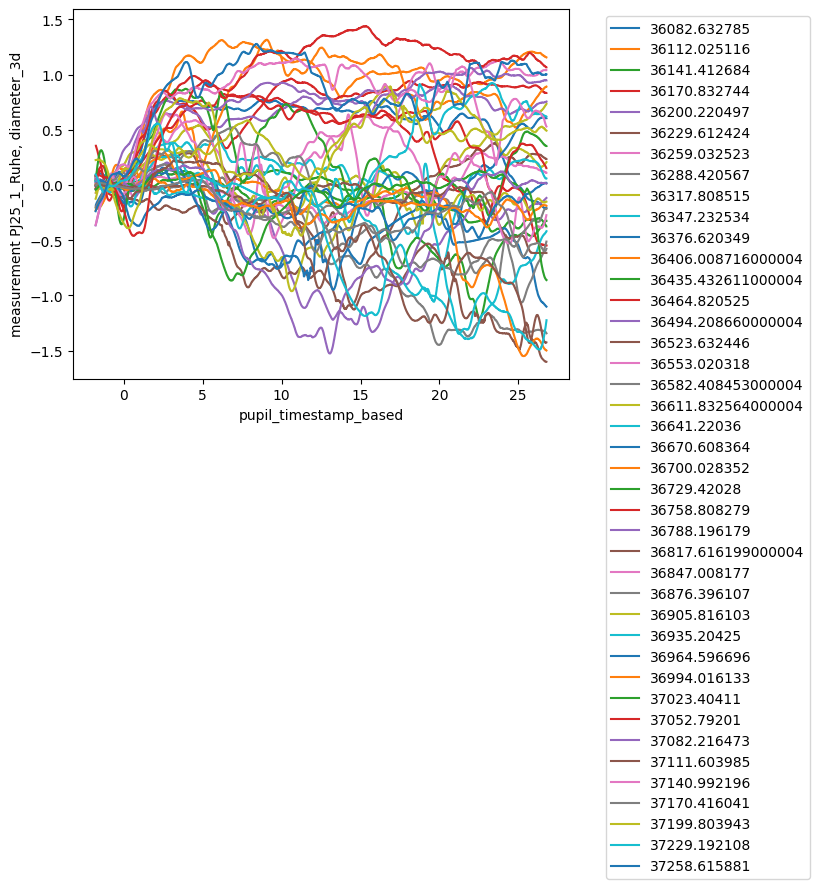

In [4]:
display(f"Anzahl der Messungen: {len(eye0.frames)}")
sub=None
i=0
for what_pf in eye0.frames:
    #display(what_pf)
    if what_pf.valid:
        what=what_pf.data
        ts=what_pf.annotation_ts
        # ts=what['pupil_timestamp'].iloc[0]
        # preprocessing.create_baseline_column(what, f'{field}_original',f'{field}_original_baseline')
        sub=what.plot(ax=sub, x='pupil_timestamp_based', y=f'{field}_baseline', ylabel='baseline adjusted pupil size', kind='line',label=ts)
        sub.set_ylabel(f'measurement {subject_id}, {field}')
         # Adjust the position of the legend
        legend = sub.legend()
        legend.set_bbox_to_anchor((1.5, 1))  # Adjust the position of the legend box

[(0, 3.8571708974809997, 36082.632785, -0.7310303345850593, 'finished', ''),
 (1, 3.607799387848005, 36112.025116, -1.205407354596938, 'finished', ''),
 (2, 4.729089793091414, 36141.412684, 0.9276125793566619, 'finished', ''),
 (3, 3.8592223781342208, 36170.832744, -0.7271278227050163, 'finished', ''),
 (4, 4.6559640576551615, 36200.220497, 0.7885061974228186, 'finished', ''),
 (5, 4.611800751092931, 36229.612424, 0.7044947648750718, 'finished', ''),
 (6, 4.878418213271253, 36259.032523, 1.2116785942444388, 'finished', ''),
 (7, 4.943710539153621, 36288.420567, 1.335883556660979, 'finished', ''),
 (8, 3.9866338375754986, 36317.808515, -0.4847542310542697, 'finished', ''),
 (9, 4.38779674725822, 36347.232534, 0.2783741067203863, 'finished', ''),
 (10, 4.423916475217523, 36376.620349, 0.3470843171938715, 'finished', ''),
 (11,
  3.676874324919952,
  36406.008716000004,
  -1.0740067673609581,
  'finished',
  ''),
 (12,
  4.5944738547036605,
  36435.432611000004,
  0.6715339768231676,
  'f

(array([3., 3., 4., 6., 2., 4., 4., 6., 6., 3.]),
 array([-1.85306709, -1.49999162, -1.14691615, -0.79384068, -0.44076521,
        -0.08768974,  0.26538573,  0.6184612 ,  0.97153667,  1.32461214,
         1.67768761]),
 <BarContainer object of 10 artists>)

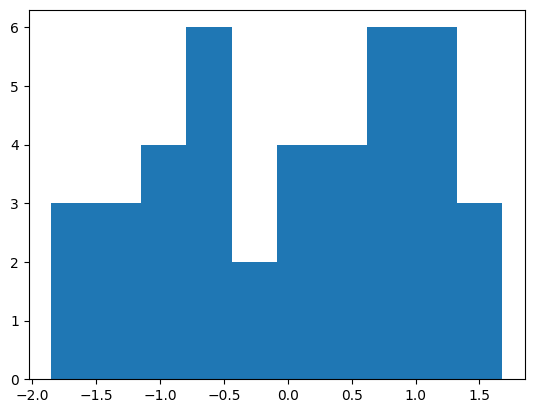

In [5]:
#display(eye0.num_valid, len(eye0.frames))
display([(f.index,f.baseline_mean,f.annotation_ts,f.zscore,f.stage,f.remark) for f in eye0.frames])


zscores=[f.zscore for f in eye0.frames if f.valid or f.stage=="zscore"]
plt.hist(zscores)

ProcessConfig(eyenum=0, column='diameter_3d', sfactor=1000, data_path='/home/marco/Nextcloud/KatharinaBeispieldaten/', subject_id='PJ25_1_Ruhe', condition='3.4Stim', timebase='3.4', stime_time_offset=0, after_var_start_offset=25.5, window_duration=29, nan_reconstruct_threshold=0, nan_before_threshold=60, nan_after_threshold=5, noise_threshold_factor=6, noise_rejection_percent=2, validate_only=False, survive_threshold=5, baseline_length=2.0)

,ts,diameter_3d_baseline
0,0.0,-0.007357
1,0.1,-0.009523
2,0.2,-0.006209
3,0.3,-0.001292
4,0.4,0.005969
...,...,...
266,26.6,-0.044633
267,26.7,-0.045491
268,26.8,-0.024632
269,26.9,NaN


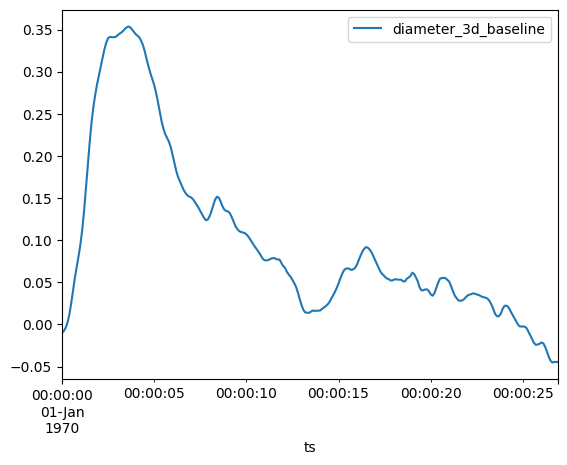

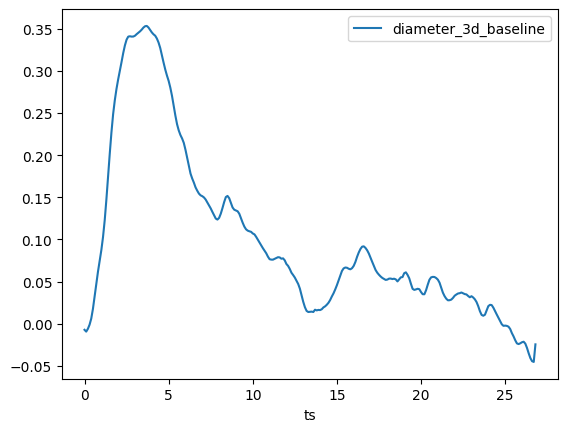

In [6]:
importlib.reload(preprocessing)
av_df=preprocessing.average_frames_by_resample(eye0,f'{field}_baseline',interval='100ms') 
av_df.plot(x='ts',y=f'{field}_baseline')
av_df=preprocessing.average_frames_by_binning(eye0,f'{field}_baseline',interval_ms=100)
av_df.plot(x='ts',y=f'{field}_baseline')
#av_df=preprocessing.average_frames3(eye0,f'{field}_baseline',interval_ms=10)
#av_df.plot(x='ts',y=f'{field}_baseline')
display(eye0.config)
display(av_df)
